In [1]:
# Basics -----------------------------------------------------
import pickle

import numpy as np
import pandas as pd
# from scipy import sparse

import matplotlib.pyplot as plt
# import regex
# import re


# # NLTK -----------------------------------------------------

# import nltk
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# #stop_words = set(nltk.corpus.stopwords.words("english"))

# # Word2vec ----------------------------------------------------
# import gensim

# SK learn --------------------------------------------------

# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectFromModel
# from sklearn.decomposition import TruncatedSVD

from sklearn import metrics

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Sampling -------------------------------------------------

# from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

# DATA ------------------------------------------------------
# df = pd.read_csv("labled_tweets.csv", index_col=0)

# Import the processed data:

In [2]:
pkl_file = open('data_svd.pkl', 'rb') # from feature set.
data_svd = pickle.load(pkl_file)
pkl_file.close()

In [6]:
data_svd.keys()

dict_keys(['y_test', 'y_train', 'X_train', 'X_test'])

In [8]:
data_svd["X_train"].shape

(7288, 311)

In [3]:
pkl_file = open('data_non_svd.pkl', 'rb') # from feature set.
data_non_svd = pickle.load(pkl_file)
pkl_file.close()

In [7]:
data_non_svd.keys()

dict_keys(['y_test', 'y_train', 'X_train', 'X_test'])

In [9]:
data_non_svd["X_train"].shape

(7288, 33833)

# Models

**You should diffenately split it up agian so you have a final test set "never" used.**

# first step

In [13]:
X_train = data_svd["X_train"]
X_test =  data_svd["X_test"]
y_train = data_svd["y_train"]
y_test = data_svd["y_test"]

In [16]:
X_train.shape

(7288, 311)

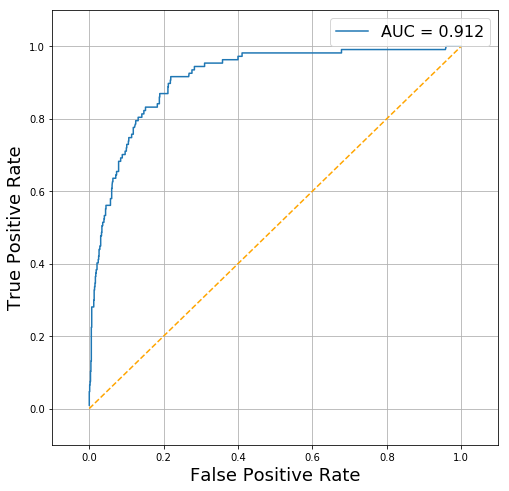

In [17]:
plt.figure(figsize=[8,8])

clf_lg = LogisticRegression().fit(X_train, y_train)
pred_proba_log = clf_lg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_log)
auc = round(metrics.roc_auc_score(y_test, pred_proba_log), 3)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))


plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

plt.legend(fontsize = 16)
#sns.despine(left=True, bottom= True)

plt.savefig('roc_all_new.pdf', bbox_inches="tight")

plt.show()
    